# Challenge Set 1:  MTA Turnstile Data

# Field Description
http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt
C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS

```
C/A      = Control Area (A002)
UNIT     = Remote Unit for a station (R051)
SCP      = Subunit Channel Position represents an specific address for a device (02-00-00)
STATION  = Represents the station name the device is located at
LINENAME = Represents all train lines that can be boarded at this station
           Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.
DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND   
DATE     = Represents the date (MM-DD-YY)
TIME     = Represents the time (hh:mm:ss) for a scheduled audit event
DESc     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
           1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
           2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. 
ENTRIES  = The comulative entry register value for a device
EXIST    = The cumulative exit register value for a device
```


In [1]:
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import datetime

## Exercise 1.1

- Open up a new Jupyter notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
...
]
}

In [4]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [180407]
turnstiles_df = get_data(week_nums)
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,20:00:00,REGULAR,6566470,2224055
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,00:00:00,REGULAR,6566470,2224055
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,04:00:00,REGULAR,6566470,2224055
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,08:00:00,REGULAR,6566470,2224055
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,12:00:00,REGULAR,6566470,2224055


In [5]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [6]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [7]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [8]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055


In [9]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
196983,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/06/2018,05:00:00,REGULAR,2869725,385736
196984,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/06/2018,09:00:00,REGULAR,2869735,385736
196985,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/06/2018,13:00:00,REGULAR,2869816,385739
196986,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/06/2018,17:00:00,REGULAR,2869949,385744
196987,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/06/2018,21:00:00,REGULAR,2870062,385749


In [10]:
# Three weeks of Data
turnstiles_df.DATE.value_counts().sort_index()

03/31/2018    28129
04/01/2018    28084
04/02/2018    28049
04/03/2018    28189
04/04/2018    28154
04/05/2018    28262
04/06/2018    28121
Name: DATE, dtype: int64


## Exercise 1.2

- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and
 station of a specific turnstile), have a list again, but let the list
 be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields
in each list. You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Your new dict should look something like

{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
[datetime.datetime(2013, 3, 2, 3, 0), 3788],
[datetime.datetime(2013, 3, 2, 7, 0), 2585],
[datetime.datetime(2013, 3, 2, 12, 0), 10653],
[datetime.datetime(2013, 3, 2, 17, 0), 11016],
[datetime.datetime(2013, 3, 2, 23, 0), 10666],
[datetime.datetime(2013, 3, 3, 3, 0), 10814],
[datetime.datetime(2013, 3, 3, 7, 0), 10229],
...
],
....
}

In [11]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [12]:
from datetime import datetime as dt

In [13]:
mask = ((turnstiles_df["C/A"] == "A002") & 
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055


In [14]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [15]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
190425,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,03/31/2018,00:00:00,REGULAR,13689971,3027500,2018-03-31 00:00:00
190426,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,03/31/2018,04:00:00,REGULAR,13689994,3027526,2018-03-31 04:00:00
190427,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,03/31/2018,08:00:00,REGULAR,13690166,3027544,2018-03-31 08:00:00
190428,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,03/31/2018,12:00:00,REGULAR,13690502,3027606,2018-03-31 12:00:00
190429,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,03/31/2018,16:00:00,REGULAR,13690940,3027680,2018-03-31 16:00:00


In [16]:
# turnstiles_df = .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)

In [17]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
67020,N183,R415,00-00-00,BROAD CHANNEL,2018-04-04 05:00:00,2
0,A002,R051,02-00-00,59 ST,2018-03-31 00:00:00,1
131317,R143,R032,02-00-03,TIMES SQ-42 ST,2018-04-03 16:00:00,1
131319,R143,R032,02-00-03,TIMES SQ-42 ST,2018-04-04 00:00:00,1
131320,R143,R032,02-00-03,TIMES SQ-42 ST,2018-04-04 04:00:00,1


In [18]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "R504") & 
(turnstiles_df["UNIT"] == "R276") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "VERNON-JACKSON") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 9, 16).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME


* Looks to be a incorrect AUD entry.  May be we should just select the Regular One.

In [19]:
turnstiles_df.DESC.value_counts()

REGULAR       196339
RECOVR AUD       649
Name: DESC, dtype: int64

* Since we are only interested in Entries, we might be OK.

In [20]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [21]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-03-31 00:00:00,1
131197,R143,R032,02-00-00,TIMES SQ-42 ST,2018-04-04 16:00:00,1
131319,R143,R032,02-00-03,TIMES SQ-42 ST,2018-04-04 00:00:00,1
131320,R143,R032,02-00-03,TIMES SQ-42 ST,2018-04-04 04:00:00,1
131321,R143,R032,02-00-03,TIMES SQ-42 ST,2018-04-04 08:00:00,1


* No more duplicate Entries

In [22]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

## Exercise 1.3

- These counts are for every n hours. (What is n?) We want total daily
  entries.

Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.

In [23]:
turnstiles_daily = turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"]).ENTRIES.first().reset_index()

In [24]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,03/31/2018,00:00:00,6566463
1,A002,R051,02-00-00,59 ST,03/31/2018,04:00:00,6566470
2,A002,R051,02-00-00,59 ST,03/31/2018,08:00:00,6566470
3,A002,R051,02-00-00,59 ST,03/31/2018,12:00:00,6566470
4,A002,R051,02-00-00,59 ST,03/31/2018,16:00:00,6566470


In [25]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [26]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,03/31/2018,00:00:00,6566463,NaN,NaN
1,A002,R051,02-00-00,59 ST,03/31/2018,04:00:00,6566470,03/31/2018,6566463.0
2,A002,R051,02-00-00,59 ST,03/31/2018,08:00:00,6566470,03/31/2018,6566470.0
3,A002,R051,02-00-00,59 ST,03/31/2018,12:00:00,6566470,03/31/2018,6566470.0
4,A002,R051,02-00-00,59 ST,03/31/2018,16:00:00,6566470,03/31/2018,6566470.0


In [27]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES
196982,TRAM2,R469,00-03-01,RIT-ROOSEVELT,04/06/2018,05:00:00,2869725,04/06/2018,2869725.0
196983,TRAM2,R469,00-03-01,RIT-ROOSEVELT,04/06/2018,09:00:00,2869735,04/06/2018,2869725.0
196984,TRAM2,R469,00-03-01,RIT-ROOSEVELT,04/06/2018,13:00:00,2869816,04/06/2018,2869735.0
196985,TRAM2,R469,00-03-01,RIT-ROOSEVELT,04/06/2018,17:00:00,2869949,04/06/2018,2869816.0
196986,TRAM2,R469,00-03-01,RIT-ROOSEVELT,04/06/2018,21:00:00,2870062,04/06/2018,2869949.0


In [28]:
# Drop the rows for last date
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [29]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES
1429,A011,R080,01-00-00,57 ST-7 AV,03/31/2018,04:00:00,886027895,03/31/2018,886028035.0
1430,A011,R080,01-00-00,57 ST-7 AV,03/31/2018,08:00:00,886027811,03/31/2018,886027895.0
1431,A011,R080,01-00-00,57 ST-7 AV,03/31/2018,12:00:00,886027423,03/31/2018,886027811.0
1432,A011,R080,01-00-00,57 ST-7 AV,03/31/2018,16:00:00,886026932,03/31/2018,886027423.0
1433,A011,R080,01-00-00,57 ST-7 AV,03/31/2018,20:00:00,886026296,03/31/2018,886026932.0


In [30]:
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 8, 27).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME


* Counter working in Reverse??? - WHHHAT

In [31]:
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size())

C/A    UNIT  SCP       STATION        
A011   R080  01-00-00  57 ST-7 AV         41
A025   R023  01-03-01  34 ST-HERALD SQ    41
A049   R088  02-05-00  CORTLANDT ST       14
A066   R118  00-00-00  CANAL ST           41
C021   R212  00-00-02  59 ST              41
D011   R394  01-06-00  BAY PKWY           38
             01-06-01  BAY PKWY           41
H003   R163  01-00-02  6 AV               41
H023   R236  00-06-00  DEKALB AV          41
J034   R007  00-00-02  104 ST             38
K026   R100  00-00-01  METROPOLITAN AV    41
N063A  R011  00-00-04  42 ST-PORT AUTH    40
             00-00-05  42 ST-PORT AUTH    41
             00-00-08  42 ST-PORT AUTH    38
N078   R175  01-03-00  14 ST              41
N137   R354  00-00-00  104 ST              1
             00-06-01  104 ST             38
N203   R195  00-00-01  161/YANKEE STAD    40
N223   R156  01-05-01  BEDFORD PK BLVD     1
N305   R017  01-03-04  LEXINGTON AV/53    41
N327   R254  00-06-01  GRAND-NEWTOWN      42
N342   R019  01-

In [32]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

1900568 18845.0
116 3136714.0
107 2687676.0
838900529 165345.0
55 5119573.0


In [33]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # May be counter is reversed?
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

1900568 18845.0
116 3136714.0
107 2687676.0
838900529 165345.0
55 5119573.0


In [34]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,03/31/2018,04:00:00,6566470,03/31/2018,6566463.0,7.0
2,A002,R051,02-00-00,59 ST,03/31/2018,08:00:00,6566470,03/31/2018,6566470.0,0.0
3,A002,R051,02-00-00,59 ST,03/31/2018,12:00:00,6566470,03/31/2018,6566470.0,0.0
4,A002,R051,02-00-00,59 ST,03/31/2018,16:00:00,6566470,03/31/2018,6566470.0,0.0
5,A002,R051,02-00-00,59 ST,03/31/2018,20:00:00,6566470,03/31/2018,6566470.0,0.0


In [35]:
import datetime as dt

# Verify that we got same results via the non-pandas version.

# see how many entries are in each day, then groupby then visualization

# shows how many times stations are showing in the data frame

# first groupby date
# then sum entries

turnstiles_daily.STATION.value_counts()
turnstiles_daily['Month'] = pd.DatetimeIndex(turnstiles_daily['DATE']).month
turnstiles_daily['Day'] = pd.DatetimeIndex(turnstiles_daily['DATE']).day
turnstiles_daily['Year'] = pd.DatetimeIndex(turnstiles_daily['DATE']).year
turnstiles_daily.groupby(['STATION', 'DATE'])[['DAILY_ENTRIES']].sum()


# find the mean of each station on each day
# then find the variance of each day
# then (mean - variance) to show the dispersin of date
# then pick which stations how the least dispersion of data on each day


DAILY_ENTRIES
STATION         DATE                     
1 AV            03/31/2018        12945.0
                04/01/2018        13367.0
                04/02/2018        17830.0
                04/03/2018        19463.0
                04/04/2018        20295.0
                04/05/2018        20759.0
                04/06/2018        21637.0
103 ST          03/31/2018        14538.0
                04/01/2018        13058.0
                04/02/2018        25155.0
                04/03/2018        28452.0
                04/04/2018        28573.0
                04/05/2018        29629.0
                04/06/2018        29051.0
103 ST-CORONA   03/31/2018        12798.0
                04/01/2018        11202.0
                04/02/2018        16912.0
                04/03/2018        18383.0
                04/04/2018        18534.0
                04/05/2018        19248.0
                04/06/2018        18645.0
104 ST          03/31/2018         1445.0
                04/01/2018         1156.0
                04/02/2018         2662.0
                04/03/2018         2892.0
                04/04/2018         3040.0
                04/05/2018         3113.0
                04/06/2018         2857.0
110 ST          03/31/2018         4394.0
                04/01/2018         3991.0
...                                   ...
WOODHAVEN BLVD  04/05/2018        25375.0
                04/06/2018        24085.0
WOODLAWN        03/31/2018         3355.0
                04/01/2018         3008.0
                04/02/2018         5748.0
                04/03/2018         6734.0
                04/04/2018         6793.0
                04/05/2018         6968.0
                04/06/2018         6514.0
WORLD TRADE CTR 03/31/2018        10423.0
                04/01/2018         8576.0
                04/02/2018        16607.0
                04/03/2018        19250.0
                04/04/2018        19159.0
                04/05/2018        21008.0
                04/06/2018        18755.0
YORK ST         03/31/2018         5667.0
                04/01/2018         4686.0
                04/02/2018         9080.0
                04/03/2018        10047.0
                04/04/2018        10493.0
                04/05/2018        11553.0
                04/06/2018        10041.0
ZEREGA AV       03/31/2018         1116.0
                04/01/2018          933.0
                04/02/2018         2150.0
                04/03/2018         2313.0
                04/04/2018         2393.0
                04/05/2018         2266.0
                04/06/2018         2328.0

[2604 rows x 1 columns]

In [96]:
turnstiles_daily['TIME'].count()

192282

In [101]:
turnstiles_daily[turnstiles_daily.STATION=='1 AV']

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,Month,Day,Year,Hour
30140,H007,R248,00-00-00,1 AV,03/31/2018,04:00:00,13372194,03/31/2018,1.337211e+07,87.0,3,31,2018,4
30141,H007,R248,00-00-00,1 AV,03/31/2018,08:00:00,13372247,03/31/2018,1.337219e+07,53.0,3,31,2018,8
30142,H007,R248,00-00-00,1 AV,03/31/2018,12:00:00,13372765,03/31/2018,1.337225e+07,518.0,3,31,2018,12
30143,H007,R248,00-00-00,1 AV,03/31/2018,16:00:00,13373401,03/31/2018,1.337276e+07,636.0,3,31,2018,16
30144,H007,R248,00-00-00,1 AV,03/31/2018,20:00:00,13374019,03/31/2018,1.337340e+07,618.0,3,31,2018,20
30145,H007,R248,00-00-00,1 AV,04/01/2018,00:00:00,13374456,03/31/2018,1.337402e+07,437.0,4,1,2018,0
30146,H007,R248,00-00-00,1 AV,04/01/2018,04:00:00,13374533,04/01/2018,1.337446e+07,77.0,4,1,2018,4
30147,H007,R248,00-00-00,1 AV,04/01/2018,08:00:00,13374584,04/01/2018,1.337453e+07,51.0,4,1,2018,8
30148,H007,R248,00-00-00,1 AV,04/01/2018,12:00:00,13374981,04/01/2018,1.337458e+07,397.0,4,1,2018,12
30149,H007,R248,00-00-00,1 AV,04/01/2018,16:00:00,13375451,04/01/2018,1.337498e+07,470.0,4,1,2018,16


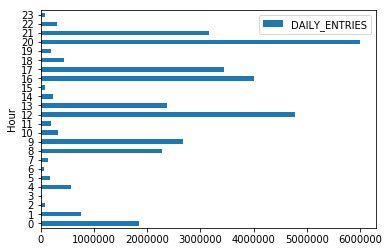

In [105]:
# turnstiles_daily['Hour'] = pd.DatetimeIndex(turnstiles_daily['TIME']).hour

# this graph shows how many daily entries are every hour
turnstiles_daily.groupby(['Hour'])[['DAILY_ENTRIES']].sum().plot(kind='barh');

# use datetime logic 
# this graph shows that there is a high traffic rate at 12 am, 8 pm, 4 pm, and 5 pm

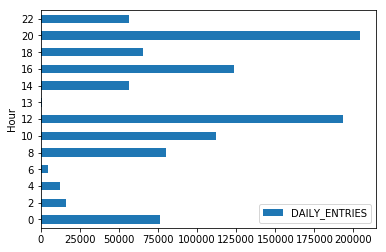

In [106]:
turnstiles_daily[turnstiles_daily.STATION=='34 ST-PENN STA'].groupby(['Hour'])[['DAILY_ENTRIES']].sum().plot(kind='barh');

In [72]:
turnstiles_daily.groupby(['STATION','Hour'])[['DAILY_ENTRIES']].sum()

DAILY_ENTRIES
STATION         Hour               
1 AV            0           19598.0
                4            4890.0
                8            7269.0
                12          28862.0
                16          27085.0
                20          38592.0
103 ST          1            9120.0
                5            1245.0
                9           34575.0
                13          41956.0
                17          43170.0
                21          38390.0
103 ST-CORONA   0            6321.0
                4            1508.0
                8           35948.0
                12          31302.0
                16          22613.0
                20          18030.0
104 ST          0             649.0
                4             257.0
                8            6424.0
                12           4947.0
                16           2823.0
                20           2065.0
110 ST          0            3941.0
                4             891.0
                8            7685.0
                12          17571.0
                16          12843.0
                20          13536.0
...                             ...
WOODHAVEN BLVD  12           7128.0
                13          24617.0
                16           5258.0
                17          28706.0
                20           4822.0
                21          24314.0
WOODLAWN        0            3291.0
                4             953.0
                8           10968.0
                12           8326.0
                16           7497.0
                20           8085.0
WORLD TRADE CTR 0            8895.0
                4             999.0
                8            5399.0
                12          17459.0
                16          27390.0
                20          53636.0
YORK ST         1            3259.0
                5             331.0
                9            6467.0
                13           9432.0
                17          16167.0
                21          25911.0
ZEREGA AV       1             420.0
                5             386.0
                9            4891.0
                13           2776.0
                17           3122.0
                21           1904.0

[2819 rows x 1 columns]

In [85]:
# isolate the top 10 stations by hour, so 10 graphs
# then see which times are the busiest
# then pick time segments workers will stay at the stations (4 hour chunks, 2 hour chunks, or 3 hour chunks)
# how do you filter out stations from the entries

# turnstiles_daily.groupby(['STATION','Hour'])[['DAILY_ENTRIES']].sum()
# turnstiles_daily.sort_values(by=['STATION','Hour'])[['STATION','Hour','DAILY_ENTRIES']]

In [108]:
# 20 entries, see below for top 10

turnstiles_daily.groupby(['STATION'])[['DAILY_ENTRIES']].sum().sort_values(['DAILY_ENTRIES'],ascending=False).head(20)

,DAILY_ENTRIES
STATION,
34 ST-PENN STA,1000455.0
GRD CNTRL-42 ST,887247.0
34 ST-HERALD SQ,754443.0
42 ST-PORT AUTH,657628.0
23 ST,650737.0
TIMES SQ-42 ST,614888.0
59 ST,611364.0
14 ST-UNION SQ,604158.0
FULTON ST,563403.0


In [87]:
# do top 10 due to the length of the presentation and gap between 10 and 11

turnstiles_daily.groupby(['STATION'])[['DAILY_ENTRIES']].sum().sort_values(['DAILY_ENTRIES'],ascending=False).head(10)

,DAILY_ENTRIES
STATION,
34 ST-PENN STA,1000455.0
GRD CNTRL-42 ST,887247.0
34 ST-HERALD SQ,754443.0
42 ST-PORT AUTH,657628.0
23 ST,650737.0
TIMES SQ-42 ST,614888.0
59 ST,611364.0
14 ST-UNION SQ,604158.0
FULTON ST,563403.0


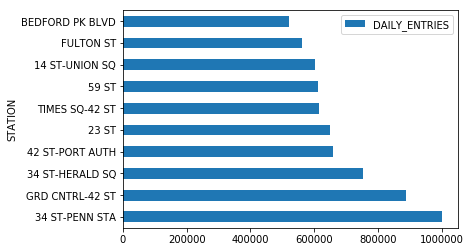

In [39]:
# show top 10 stations

turnstiles_daily.groupby(['STATION'])[['DAILY_ENTRIES']].sum().sort_values(['DAILY_ENTRIES'],ascending=False).head(10).plot(kind='barh');

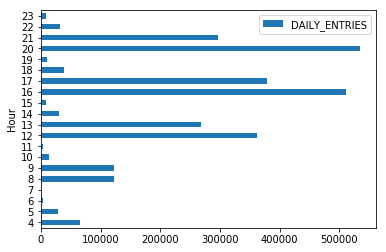

In [111]:
# build a graph that shows which days should be targeted
# March 31 - April 6 (Sat - Fri)

# Graph for March 31 (sat)
turnstiles_daily[turnstiles_daily.Day==31].groupby(['Hour'])[['DAILY_ENTRIES']].sum().plot(kind='barh');

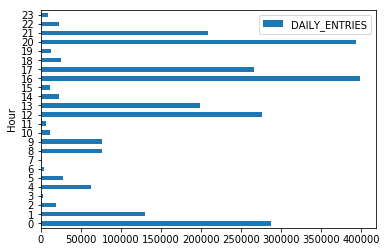

In [112]:
# Graph for April 1 (sun)
turnstiles_daily[turnstiles_daily.Day==1].groupby(['Hour'])[['DAILY_ENTRIES']].sum().plot(kind='barh');

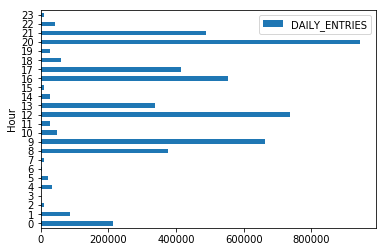

In [113]:
# Graph for April 2 (mon)
turnstiles_daily[turnstiles_daily.Day==2].groupby(['Hour'])[['DAILY_ENTRIES']].sum().plot(kind='barh');

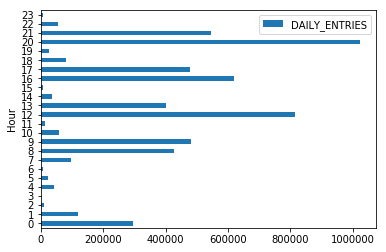

In [114]:
# Graph for April 3 (tues)
turnstiles_daily[turnstiles_daily.Day==3].groupby(['Hour'])[['DAILY_ENTRIES']].sum().plot(kind='barh');

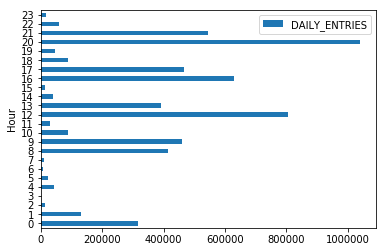

In [115]:
# Graph for April 4 (wed)
turnstiles_daily[turnstiles_daily.Day==4].groupby(['Hour'])[['DAILY_ENTRIES']].sum().plot(kind='barh');

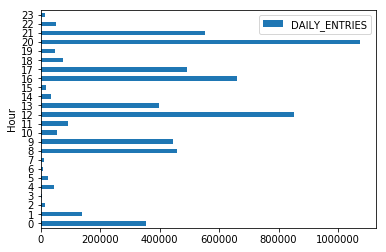

In [116]:
# Graph for April 5 (thurs)
turnstiles_daily[turnstiles_daily.Day==5].groupby(['Hour'])[['DAILY_ENTRIES']].sum().plot(kind='barh');

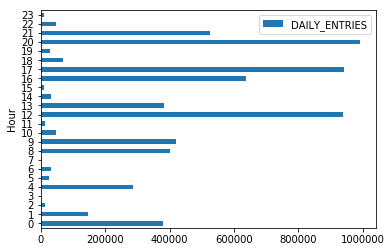

In [117]:
# Graph for April 6 (fri)
turnstiles_daily[turnstiles_daily.Day==6].groupby(['Hour'])[['DAILY_ENTRIES']].sum().plot(kind='barh');

In [109]:
# build a graph that targets the times I highlighted above (12 am, 8 pm, 4 pm, and 5 pm)

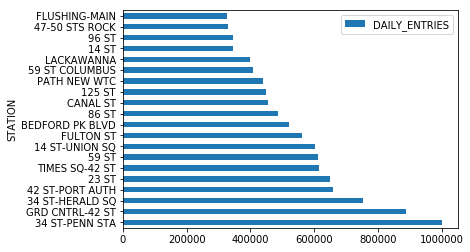

In [40]:
# shows top 10 stations

turnstiles_daily.groupby(['STATION'])[['DAILY_ENTRIES']].sum().sort_values(['DAILY_ENTRIES'],ascending=False).head(20).plot(kind='barh');

# we picked the top 10 station because there is a drop off from 11 on down

### Exercise 1.4
We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the
notebook. To plot the time series, import matplotlib with

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the
turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)


## Exercise 1.5

- So far we've been operating on a single turnstile level, let's
  combine turnstiles in the same ControlArea/Unit/Station combo. There
  are some ControlArea/Unit/Station groups that have a single
  turnstile, but most have multiple turnstilea-- same value for the
  C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each
ControlArea/UNIT/STATION combo, for each day, add the counts from each
turnstile belonging to that combo.


## Exercise 1.6

Similarly, combine everything in each station, and come up with a time
series of `[(date1, count1),(date2,count2),...]` type of time series
for each STATION, by adding up all the turnstiles in a station.


## Exercise 1.7

Plot the time series for a station.


## Exercise 1.8

- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.
`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.


## Exercise 1.9

- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate


## Exercise 1.10

- Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among
different stations.

This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

*Additional Hint*:

If you want to see which stations take the meat of the traffic, you
can sort the total ridership counts and make a `plt.bar` graph. For
this, you want to have two lists: the indices of each bar, and the
values. The indices can just be `0,1,2,3,...`, so you can do

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)